In [13]:
import os
import csv
import pandas as pd
import numpy as np
import time


from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


file_dir_train = os.path.join(os.getcwd(), 'train.csv')
file_dir_test = os.path.join(os.getcwd(), 'test.csv')
df_train = pd.read_csv(file_dir_train)
df_test = pd.read_csv(file_dir_test)

X_train = np.array(df_train.iloc[:,1:])
y_train = np.array(df_train.iloc[:,0])
X_test= np.array(df_test.iloc[:,1:])
y_test = np.array(df_test.iloc[:,0])

In [14]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=3, scoring_fit='neg_mean_squared_error'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2, 
        return_train_score=True
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [15]:
mlp = MLPClassifier(random_state=1)

parameter_space = {
    'max_iter' : [30,50,70,100],
    'hidden_layer_sizes' : [ (30),(70), (100)],
    'activation' : ['relu', 'tanh'],
    'solver' : ['sgd', 'adam'],
    'alpha' : [0.0001, 0.01],
    'learning_rate' : [ 'constant', 'adaptive']
}

start = time.time()
clf, pred = algorithm_pipeline(X_train, X_test, y_train, y_test, mlp, parameter_space, 3)
end = time.time()

Fitting 3 folds for each of 192 candidates, totalling 576 fits


In [16]:
print(end - start)

4116.928211212158


In [17]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 100, 'learning_rate': 'constant', 'max_iter': 50, 'solver': 'adam'}


In [18]:
print("Accuracy: " + str(accuracy_score(y_test, pred)))

Accuracy: 0.9572666666666667


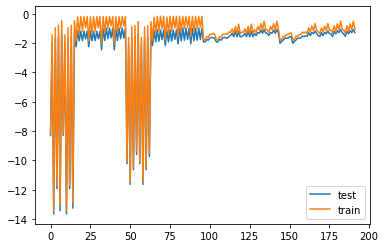

In [19]:
test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()